<a href="https://colab.research.google.com/github/yehiayaser/General-Deep-learning-Models/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

# Task
Unzip the file "flower_photos.tgz", load the image data for the four types of flowers, split the data into training and testing sets, apply a CNN model for deep learning, and evaluate the model's performance.

In [2]:
import os
import zipfile

file_path = '/content/archive.zip'

if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
else:
    try:
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall('/content/')
        print(f"Successfully unzipped {file_path} to /content/")
    except zipfile.BadZipFile:
        print(f"Error: {file_path} is not a valid zip file or is corrupted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

Successfully unzipped /content/archive.zip to /content/


In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


# Define the base directory where the flower images are located
base_dir = '/content/flowers'

# List of the four flower types you want to load
flower_types = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'] # Assuming these are the directory names

data = []
labels = []

# Define the target image size (width, height)
img_width, img_height = 227, 227 # You can adjust these values

# Iterate through each flower type directory
for flower_type in flower_types:
    flower_dir = os.path.join(base_dir, flower_type)
    if os.path.isdir(flower_dir):
        # Iterate through each image file in the directory
        for img_file in os.listdir(flower_dir):
            img_path = os.path.join(flower_dir, img_file)
            # Read the image using OpenCV
            img = cv2.imread(img_path)
            if img is not None:
                # Resize the images to a consistent size
                img = cv2.resize(img, (img_width, img_height))
                data.append(img)
                labels.append(flower_type)
    else:
        print(f"Warning: Directory not found for flower type: {flower_type}")

# Convert the lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} images with labels.")
print(f"Labels: {np.unique(labels)}")

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Loaded 4317 images with labels.
Labels: ['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']
Training data shape: (3453, 227, 227, 3)
Testing data shape: (864, 227, 227, 3)
Training labels shape: (3453,)
Testing labels shape: (864,)


In [9]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

print(f"Shape of one-hot encoded training labels: {y_train_one_hot.shape}")
print(f"Shape of one-hot encoded testing labels: {y_test_one_hot.shape}")

Shape of one-hot encoded training labels: (3453, 5)
Shape of one-hot encoded testing labels: (864, 5)


In [10]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(img_width, img_height, 3)),  # Add an Input layer explicitly
    Conv2D(filters = 96, kernel_size = (11,11),strides=(4,4),padding = 'Same',activation ='relu' ),
    MaxPooling2D((3, 3)),
    Conv2D(filters = 256, kernel_size = (5,5),strides=(1,1),padding = 'Same',activation ='relu'),
    MaxPooling2D((3, 3)),
    Conv2D(filters = 384, kernel_size = (3,3),strides=(1,1),padding = 'Same',activation ='relu'),
    Conv2D(filters = 384, kernel_size = (3,3),strides=(1,1),padding = 'Same',activation ='relu'),
    Conv2D(filters = 256, kernel_size = (3,3),strides=(1,1),padding = 'Same',activation ='relu'),

    MaxPooling2D((3, 3)),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(labels)), activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 19, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 19, 19, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,879,045 (14.80 MB)

 Trainable params: 3,879,045 (14.80 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (3453, 227, 227, 3)
Testing data shape: (864, 227, 227, 3)
Training labels shape: (3453,)
Testing labels shape: (864,)


In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=100, validation_split=0.2)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 533ms/step - accuracy: 0.2143 - loss: 36.0056 - val_accuracy: 0.3025 - val_loss: 1.4659
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.3379 - loss: 1.4693 - val_accuracy: 0.3546 - val_loss: 1.4209
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.3639 - loss: 1.4314 - val_accuracy: 0.5065 - val_loss: 1.2863
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.4704 - loss: 1.2672 - val_accuracy: 0.5340 - val_loss: 1.1506
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5260 - loss: 1.1573 - val_accuracy: 0.6006 - val_loss: 1.0721
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5571 - loss: 1.1097 - val_accuracy: 0.6252 - val_loss: 0.9835
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6200 - loss: 1.0105 - val_accuracy: 0.5876 - val_loss: 1.0639
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6231 - loss: 0.9984 - val_accuracy: 0.5933 

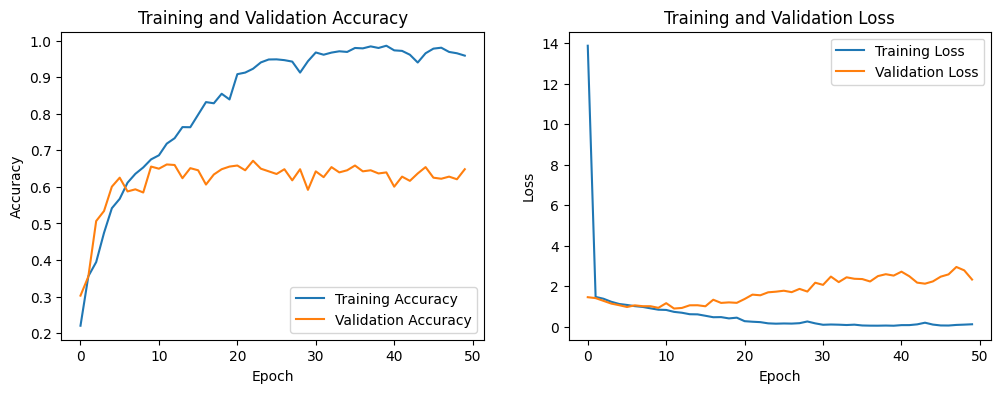

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
from sklearn.metrics import classification_report
import numpy as np

# Predict the classes for the test data
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert the one-hot encoded test labels back to original class labels
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Get the class names from the label encoder
class_names = label_encoder.classes_

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Classification Report:
              precision    recall  f1-score   support

       daisy       0.58      0.69      0.63       162
   dandelion       0.67      0.75      0.71       223
        rose       0.58      0.43      0.49       155
   sunflower       0.71      0.56      0.62       135
       tulip       0.61      0.65      0.63       189

    accuracy                           0.63       864
   macro avg       0.63      0.62      0.62       864
weighted avg       0.63      0.63      0.63       864

